<a href="https://colab.research.google.com/github/kleongf/Machine-Learning-Projects/blob/main/OnlinePurchasingIntention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Training an LSTM Network on UC Irvine's Online Shoppers Purchasing Intention Dataset**


Installing and importing required packages

In [2]:
!pip install ucimlrepo
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install tensorflow
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns

Downloading dataset from UCI machine learning repo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# Drop specified columns: no information given about which operating system, browser, region, etc. corresponds to each number
columns_to_drop = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']
X = X.drop(columns=columns_to_drop)

print(type(X))
print(type(y))

print(X.head())
print(online_shoppers_purchasing_intention_dataset.variables)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month        VisitorType  \
0         0.20       0.20         0.0         0.0   Feb  R

Visualizing data

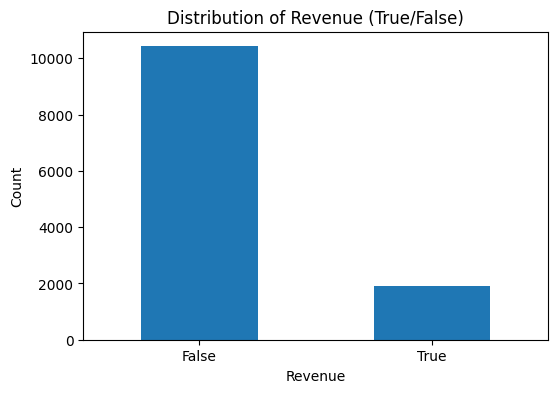

In [5]:
import matplotlib.pyplot as plt

# Count the occurrences of True and False in the 'Revenue' column
revenue_counts = y['Revenue'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
revenue_counts.plot(kind='bar')
plt.title('Distribution of Revenue (True/False)')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.xticks(rotation=0) # Rotate x-axis labels for better readability
plt.show()

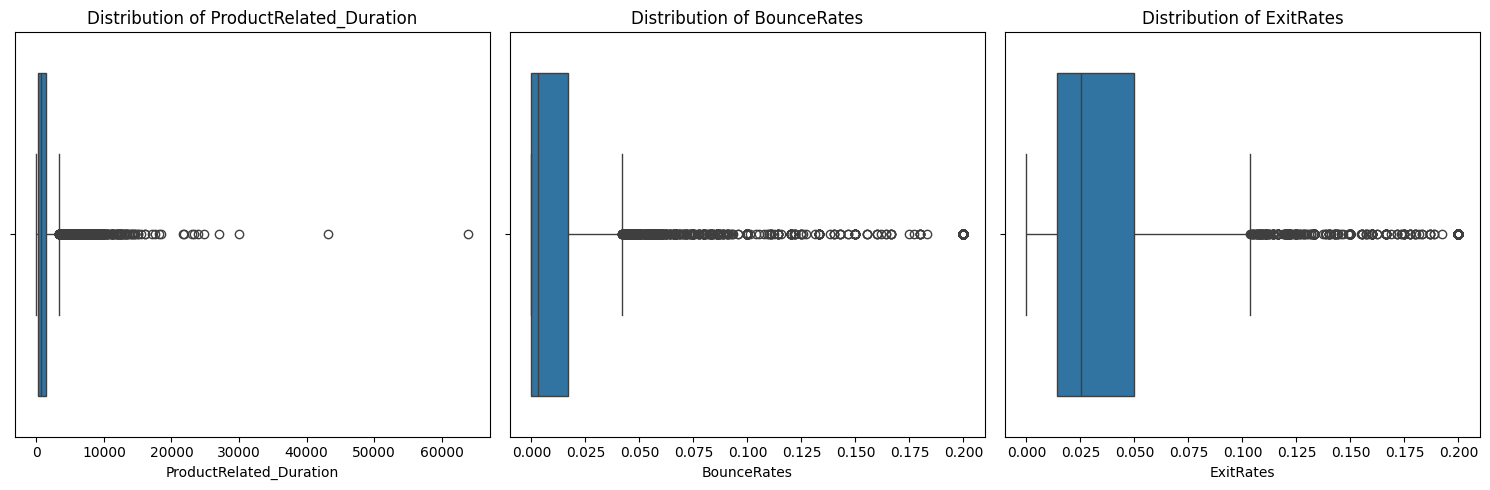

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the continuous columns to visualize
continuous_cols = ['ProductRelated_Duration', 'BounceRates', 'ExitRates']

# Create box plots for each selected continuous column
plt.figure(figsize=(15, 5))
for i, col in enumerate(continuous_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=X[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Finding categorical data: need to be converted using one-hot encoding

In [7]:
# Display unique categories for 'Month'
print("Unique categories for Month:")
print(X['Month'].unique())

# Display unique categories for 'VisitorType'
print("\nUnique categories for VisitorType:")
print(X['VisitorType'].unique())

Unique categories for Month:
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']

Unique categories for VisitorType:
['Returning_Visitor' 'New_Visitor' 'Other']


In [8]:
# One-hot encode 'Month' and 'VisitorType'
X_encoded = pd.get_dummies(X, columns=['Month', 'VisitorType'], dtype=int)

# Display the head of the encoded DataFrame
print("Head of the one-hot encoded DataFrame:")
display(X_encoded.head())

Head of the one-hot encoded DataFrame:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


Normalizing all data from 0 to 1

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Select the continuous columns to normalize
continuous_cols_to_normalize = X_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Display the selected continuous columns
print("Selected continuous columns to normalize: " + ", ".join(continuous_cols_to_normalize))

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the selected continuous columns in X_encoded
X_encoded[continuous_cols_to_normalize] = scaler.fit_transform(X_encoded[continuous_cols_to_normalize])

# Display the head of the normalized DataFrame
print("Head of the DataFrame after normalization:")
display(X_encoded.head())

Selected continuous columns to normalize: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, Month_Aug, Month_Dec, Month_Feb, Month_Jul, Month_June, Month_Mar, Month_May, Month_Nov, Month_Oct, Month_Sep, VisitorType_New_Visitor, VisitorType_Other, VisitorType_Returning_Visitor
Head of the DataFrame after normalization:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
# Convert boolean values in 'Revenue' to 0 and 1
y_encoded = y['Revenue'].astype(int)

# Display the head of the encoded target variable
print("Head of the encoded target variable:")
display(y_encoded.head())

Head of the encoded target variable:


,Revenue
0,0
1,0
2,0
3,0
4,0


Wanted to confirm that all the data was normalized

In [11]:
# Print the range of values for each column in X_encoded
print("Range of values for each variable in X_encoded:")
for col in X_encoded.columns:
    min_val = X_encoded[col].min()
    max_val = X_encoded[col].max()
    print(f"  {col}: Min = {min_val}, Max = {max_val}")

Range of values for each variable in X_encoded:
  Administrative: Min = 0.0, Max = 1.0
  Administrative_Duration: Min = 0.0, Max = 1.0
  Informational: Min = 0.0, Max = 1.0
  Informational_Duration: Min = 0.0, Max = 1.0
  ProductRelated: Min = 0.0, Max = 1.0
  ProductRelated_Duration: Min = 0.0, Max = 0.9999999999999999
  BounceRates: Min = 0.0, Max = 1.0
  ExitRates: Min = 0.0, Max = 1.0
  PageValues: Min = 0.0, Max = 1.0
  SpecialDay: Min = 0.0, Max = 1.0
  Weekend: Min = False, Max = True
  Month_Aug: Min = 0.0, Max = 1.0
  Month_Dec: Min = 0.0, Max = 1.0
  Month_Feb: Min = 0.0, Max = 1.0
  Month_Jul: Min = 0.0, Max = 1.0
  Month_June: Min = 0.0, Max = 1.0
  Month_Mar: Min = 0.0, Max = 1.0
  Month_May: Min = 0.0, Max = 1.0
  Month_Nov: Min = 0.0, Max = 1.0
  Month_Oct: Min = 0.0, Max = 1.0
  Month_Sep: Min = 0.0, Max = 1.0
  VisitorType_New_Visitor: Min = 0.0, Max = 1.0
  VisitorType_Other: Min = 0.0, Max = 1.0
  VisitorType_Returning_Visitor: Min = 0.0, Max = 1.0


Train test split (80/20)

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9864, 24)
Shape of X_test: (2466, 24)
Shape of y_train: (9864,)
Shape of y_test: (2466,)


Creating the model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SimpleRNN
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn

# Convert DataFrames to numpy arrays and ensure float32 dtype
X_train_np = X_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)
y_train_np = y_train.values.astype(np.float32) # Convert y_train as well

# Reshape input for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], 1, X_train_np.shape[1]))
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], 1, X_test_np.shape[1]))

# Define the LSTM model
# according to what i read the number of neurons should increase proportionally to the input
num_inputs = X_train.shape[1]
num_neurons = num_inputs * 4

model = Sequential()
model.add(LSTM(units=num_neurons, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True)) # Set return_sequences to True
model.add(SimpleRNN(units=num_neurons, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=num_neurons, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True)) # Set return_sequences to True
model.add(SimpleRNN(units=num_neurons, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid')) # Sigmoid for binary classification
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 96)          │        46,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 1, 96)          │        18,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 96)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 1, 96)          │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 96)             │        18,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,729 (616.13 KB)

 Trainable params: 157,729 (616.13 KB)

 Non-trainable params: 0 (0.00 B)

Compiling, training, and evaluating the model

In [17]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
print("Training the LSTM model...")
history = model.fit(X_train_reshaped, y_train_np, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
print("\nEvaluating the LSTM model...")
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Training the LSTM model...
Epoch 1/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8771 - loss: 0.3024 - val_accuracy: 0.8834 - val_loss: 0.3075
Epoch 2/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8864 - loss: 0.2829 - val_accuracy: 0.8936 - val_loss: 0.2718
Epoch 3/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8852 - loss: 0.2717 - val_accuracy: 0.8925 - val_loss: 0.2664
Epoch 4/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8940 - loss: 0.2619 - val_accuracy: 0.8936 - val_loss: 0.2567
Epoch 5/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8955 - loss: 0.2537 - val_accuracy: 0.8936 - val_loss: 0.2556
Epoch 6/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9021 - loss: 0.2469 - val_accuracy: 0.8920 - val_loss: 0.2688
Epoch 7/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8953 - loss: 0.2506 - val_accuracy: 0.8936 - val_loss: 0.2502
Epoch 8/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.902

Graphing results

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.71      0.57      0.63       382

    accuracy                           0.90      2466
   macro avg       0.82      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466


Confusion Matrix:
[[1995   89]
 [ 164  218]]


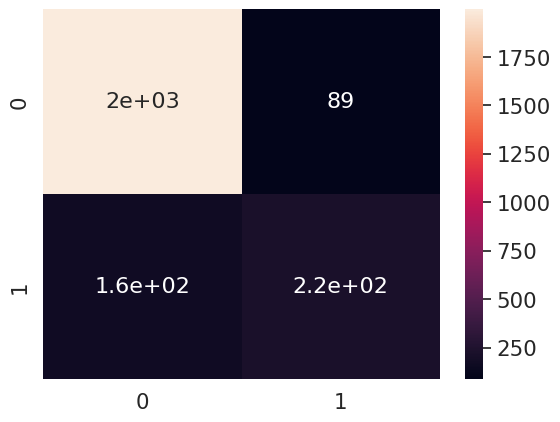

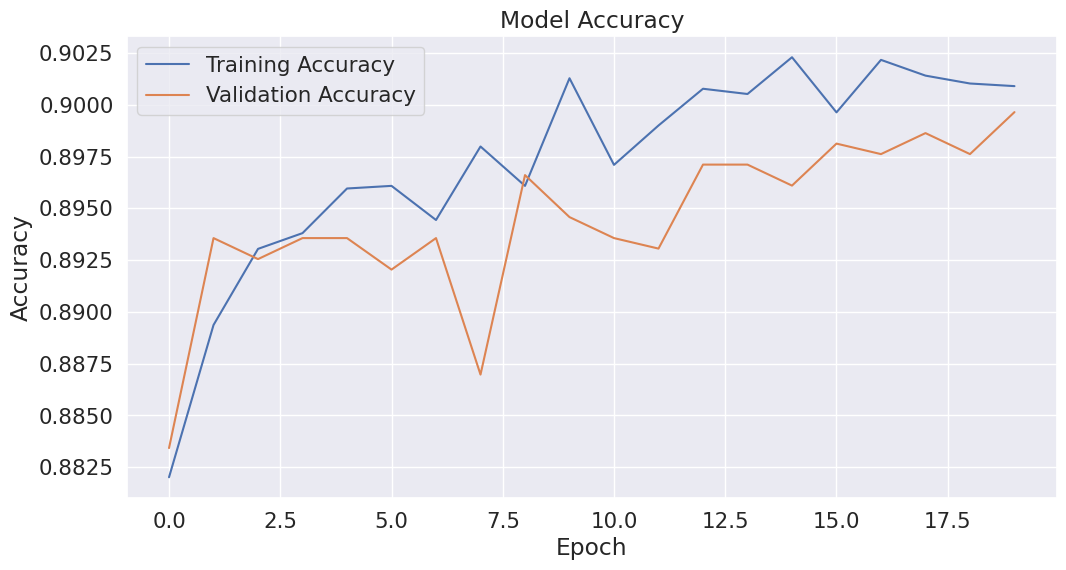

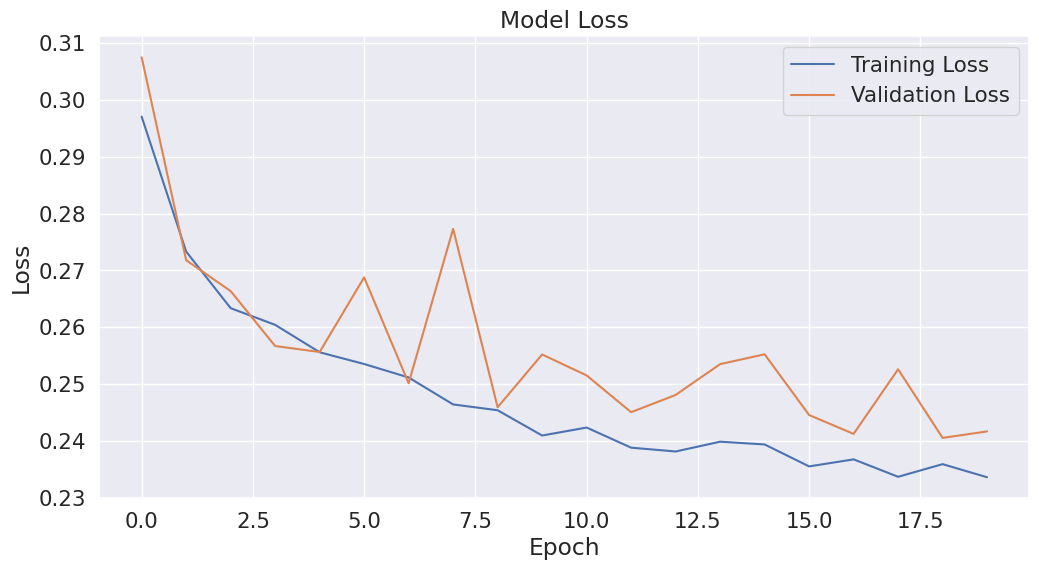

In [18]:
# Make predictions
y_pred_prob = model.predict(X_test_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to binary predictions

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
df_cm = pd.DataFrame(cm, range(2), range(2)) # Corrected 'array' to 'cm'
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()